In [21]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

from datetime import datetime
import numpy as np
import time
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA):

In [22]:
#selecting rows from the dataset which has crime=1
data=pd.read_csv("C:/Users/TAHA MUZAMMIL/Desktop/LUMS DATA/Smester 2/Big Data Analytics/BDA project/Dataset/Denver_dataset.csv")
data= data.loc[data['IS_CRIME'] == 1]
data

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2.016462e+09,2.016460e+15,5499,0,traf-other,all-other-crimes,7/21/2016 18:40,NaN,7/21/2016 19:09,N COLUMBINE ST / E 48TH AVE,3152605.0,1710822.0,-104.957009,39.783762,2.0,212.0,elyria-swansea,1,0
2,2.016362e+09,2.016360e+15,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,6/9/2016 0:28,NaN,6/9/2016 17:45,2347 N AKRON CT,3173436.0,1699056.0,-104.883175,39.751097,5.0,512.0,stapleton,1,0
4,2.016292e+09,2.016290e+15,2404,0,theft-of-motor-vehicle,auto-theft,5/10/2016 15:00,5/10/2016 15:15,5/10/2016 15:50,E HARVARD AVE / S MILWAUKEE ST,3154183.0,1669827.0,-104.952274,39.671197,3.0,314.0,university-park,1,0
5,2.016394e+09,2.016390e+15,2404,0,theft-of-motor-vehicle,auto-theft,6/22/2016 22:00,6/23/2016 8:30,6/23/2016 8:54,4100 BLK N YATES ST,3126137.0,1706839.0,-105.051254,39.773224,1.0,111.0,berkeley,1,0
7,2.016439e+09,2.016440e+15,2999,0,criminal-mischief-other,public-disorder,7/11/2016 16:50,NaN,7/11/2016 19:56,3699 S MONACO ST,3164695.0,1662180.0,-104.915106,39.650024,3.0,324.0,hampden-south,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467145,2.019806e+10,2.019810e+16,3562,0,drug-marijuana-possess,drug-alcohol,11/9/2019 11:05,NaN,11/9/2019 12:24,8400 PENA BLVD,3231977.0,1735292.0,-104.673812,39.849292,7.0,759.0,dia,1,0
467146,2.020372e+09,2.020370e+15,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/18/2020 20:35,NaN,6/18/2020 20:57,N DOWNING MARION ALY / E MLK BLVD,3148234.0,1702872.0,-104.972725,39.762009,2.0,211.0,whittier,1,0
467147,2.020297e+09,2.020300e+15,5444,0,traf-habitual-offender,all-other-crimes,5/14/2020 15:38,NaN,5/14/2020 18:20,W 44TH AVE / N YATES ST,3126226.0,1708059.0,-105.050916,39.776572,1.0,111.0,berkeley,1,0
467148,2.020601e+10,2.020600e+16,2399,0,theft-other,larceny,6/2/2020 9:15,6/2/2020 16:15,6/4/2020 15:38,9725 E HARVARD AVE,3176427.0,1670675.0,-104.873234,39.673130,3.0,323.0,hampden,1,0


In [23]:
types=["aggravated-assault","all-other-crimes","arson","auto-theft","burglary","drug-alcohol","larceny","murder","other-crimes-against-persons","theft-from-motor-vehicle","sexual-assault","robbery","public-disorder"]

dataset1=data.loc[(data["OFFENSE_CATEGORY_ID"]==types[0]) | (data["OFFENSE_CATEGORY_ID"]==types[1]) | (data["OFFENSE_CATEGORY_ID"]==types[2]) | (data["OFFENSE_CATEGORY_ID"]==types[3]) | (data["OFFENSE_CATEGORY_ID"]==types[4]) | (data["OFFENSE_CATEGORY_ID"]==types[5]) | (data["OFFENSE_CATEGORY_ID"]==types[6]) | (data["OFFENSE_CATEGORY_ID"]==types[7]) | (data["OFFENSE_CATEGORY_ID"]==types[8])| (data["OFFENSE_CATEGORY_ID"]==types[9])| (data["OFFENSE_CATEGORY_ID"]==types[10]) | (data["OFFENSE_CATEGORY_ID"]==types[11]) | (data["OFFENSE_CATEGORY_ID"]==types[12])]
dataset1

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2.016462e+09,2.016460e+15,5499,0,traf-other,all-other-crimes,7/21/2016 18:40,NaN,7/21/2016 19:09,N COLUMBINE ST / E 48TH AVE,3152605.0,1710822.0,-104.957009,39.783762,2.0,212.0,elyria-swansea,1,0
2,2.016362e+09,2.016360e+15,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,6/9/2016 0:28,NaN,6/9/2016 17:45,2347 N AKRON CT,3173436.0,1699056.0,-104.883175,39.751097,5.0,512.0,stapleton,1,0
4,2.016292e+09,2.016290e+15,2404,0,theft-of-motor-vehicle,auto-theft,5/10/2016 15:00,5/10/2016 15:15,5/10/2016 15:50,E HARVARD AVE / S MILWAUKEE ST,3154183.0,1669827.0,-104.952274,39.671197,3.0,314.0,university-park,1,0
5,2.016394e+09,2.016390e+15,2404,0,theft-of-motor-vehicle,auto-theft,6/22/2016 22:00,6/23/2016 8:30,6/23/2016 8:54,4100 BLK N YATES ST,3126137.0,1706839.0,-105.051254,39.773224,1.0,111.0,berkeley,1,0
7,2.016439e+09,2.016440e+15,2999,0,criminal-mischief-other,public-disorder,7/11/2016 16:50,NaN,7/11/2016 19:56,3699 S MONACO ST,3164695.0,1662180.0,-104.915106,39.650024,3.0,324.0,hampden-south,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467143,2.020619e+09,2.020620e+15,1315,0,aggravated-assault,aggravated-assault,10/16/2020 23:05,NaN,10/16/2020 23:05,1355 N SANTA FE DR,3140879.0,1693841.0,-104.999064,39.737331,1.0,123.0,lincoln-park,1,0
467145,2.019806e+10,2.019810e+16,3562,0,drug-marijuana-possess,drug-alcohol,11/9/2019 11:05,NaN,11/9/2019 12:24,8400 PENA BLVD,3231977.0,1735292.0,-104.673812,39.849292,7.0,759.0,dia,1,0
467146,2.020372e+09,2.020370e+15,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/18/2020 20:35,NaN,6/18/2020 20:57,N DOWNING MARION ALY / E MLK BLVD,3148234.0,1702872.0,-104.972725,39.762009,2.0,211.0,whittier,1,0
467147,2.020297e+09,2.020300e+15,5444,0,traf-habitual-offender,all-other-crimes,5/14/2020 15:38,NaN,5/14/2020 18:20,W 44TH AVE / N YATES ST,3126226.0,1708059.0,-105.050916,39.776572,1.0,111.0,berkeley,1,0


In [24]:
dataset1['OFFENSE_CATEGORY_ID'].value_counts()

all-other-crimes                80230
larceny                         48723
public-disorder                 48043
theft-from-motor-vehicle        42768
auto-theft                      31658
drug-alcohol                    25996
burglary                        23535
other-crimes-against-persons    22644
aggravated-assault              12634
robbery                          6140
sexual-assault                   4005
arson                             616
murder                            343
Name: OFFENSE_CATEGORY_ID, dtype: int64

In [25]:
dataset2 = dataset1[["OFFENSE_CATEGORY_ID","FIRST_OCCURRENCE_DATE","NEIGHBORHOOD_ID"]]
dataset2

,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,NEIGHBORHOOD_ID
0,all-other-crimes,7/21/2016 18:40,elyria-swansea
2,theft-from-motor-vehicle,6/9/2016 0:28,stapleton
4,auto-theft,5/10/2016 15:00,university-park
5,auto-theft,6/22/2016 22:00,berkeley
7,public-disorder,7/11/2016 16:50,hampden-south
...,...,...,...
467143,aggravated-assault,10/16/2020 23:05,lincoln-park
467145,drug-alcohol,11/9/2019 11:05,dia
467146,all-other-crimes,6/18/2020 20:35,whittier
467147,all-other-crimes,5/14/2020 15:38,berkeley


Count of Crimes Category:

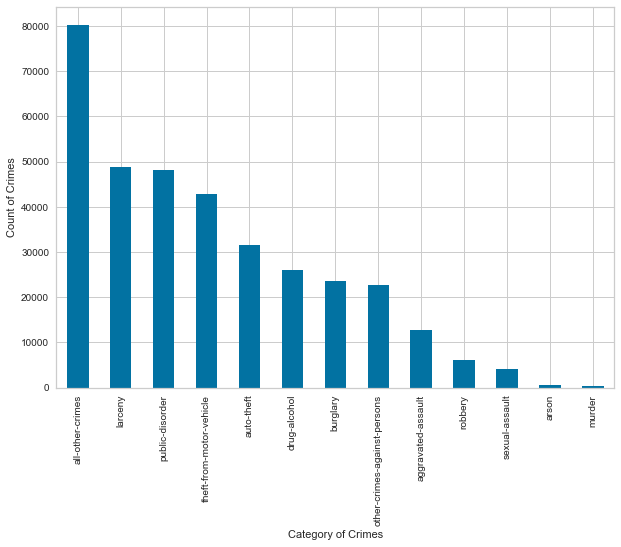

<Figure size 576x396 with 0 Axes>

In [26]:
fig, ax = plt.subplots(figsize=(10, 7))
dataset2['OFFENSE_CATEGORY_ID'].value_counts().plot(kind='bar');
# plt.plot(x_coordinates, y_coordinates)
plt.xlabel("Category of Crimes")
plt.ylabel("Count of Crimes")
plt.show()
plt.savefig('C:/Users/TAHA MUZAMMIL/Desktop/crimes_count.png')

Count of Crimes after coverting into 5 groups:

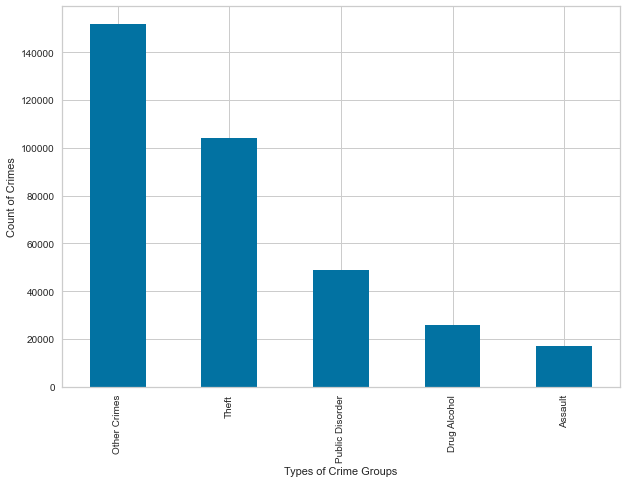

<Figure size 576x396 with 0 Axes>

In [27]:

names=["temp","Assault", "Drug Alcohol", "Other Crimes","Public Disorder","Theft"]
crime_numeric = {"OFFENSE_CATEGORY_ID": {"aggravated-assault":names[1],"auto-theft":names[5],"all-other-crimes":names[3],"arson":names[4],"burglary":names[5],"drug-alcohol":names[2],"larceny":names[3],"murder":names[1],"other-crimes-against-persons":names[3],"theft-from-motor-vehicle":names[5],"sexual-assault":names[1],"robbery":names[5],"public-disorder":names[4]}}
dataset3 = dataset2.replace(crime_numeric)

fig, ax = plt.subplots(figsize=(10, 7))
dataset3['OFFENSE_CATEGORY_ID'].value_counts().plot(kind='bar', );
# plt.plot(x_coordinates, y_coordinates)
plt.xlabel("Types of Crime Groups")
plt.ylabel("Count of Crimes")
plt.show()
plt.savefig('C:/Users/TAHA MUZAMMIL/Desktop/crimes_count.png')

### Number of crimes on every Hour, Month and Days:

In [28]:
# Splitting the Date to Day, Month, Year, Hour
x = pd.to_datetime(dataset3['FIRST_OCCURRENCE_DATE'])
dataset3['Year'] = x.dt.year
dataset3['Month'] = x.dt.month
dataset3['Day'] = x.dt.day_name()
dataset3['time'] = x.dt.hour
dataset3 = dataset3.drop(['FIRST_OCCURRENCE_DATE'], axis=1)
dataset3.head()

,OFFENSE_CATEGORY_ID,NEIGHBORHOOD_ID,Year,Month,Day,time
0,Other Crimes,elyria-swansea,2016,7,Thursday,18
2,Theft,stapleton,2016,6,Thursday,0
4,Theft,university-park,2016,5,Tuesday,15
5,Theft,berkeley,2016,6,Wednesday,22
7,Public Disorder,hampden-south,2016,7,Monday,16


In [29]:
dataset3.to_csv("predata.csv")

In [30]:
#deleting the extra column from the .csv file
dataset4= pd.read_csv("predata.csv")
del dataset4['Unnamed: 0']
dataset4.head()

,OFFENSE_CATEGORY_ID,NEIGHBORHOOD_ID,Year,Month,Day,time
0,Other Crimes,elyria-swansea,2016,7,Thursday,18
1,Theft,stapleton,2016,6,Thursday,0
2,Theft,university-park,2016,5,Tuesday,15
3,Theft,berkeley,2016,6,Wednesday,22
4,Public Disorder,hampden-south,2016,7,Monday,16


In [31]:
crime_numeric = {"OFFENSE_CATEGORY_ID": {"aggravated-assault":1,"auto-theft":5,"all-other-crimes":3,"arson":4,"burglary":5,"drug-alcohol":2,"larceny":3,"murder":1,"other-crimes-against-persons":3,"theft-from-motor-vehicle":5,"sexual-assault":1,"robbery":5,"public-disorder":4}}
dataset4 = dataset4.replace(crime_numeric)
dataset4

,OFFENSE_CATEGORY_ID,NEIGHBORHOOD_ID,Year,Month,Day,time
0,Other Crimes,elyria-swansea,2016,7,Thursday,18
1,Theft,stapleton,2016,6,Thursday,0
2,Theft,university-park,2016,5,Tuesday,15
3,Theft,berkeley,2016,6,Wednesday,22
4,Public Disorder,hampden-south,2016,7,Monday,16
...,...,...,...,...,...,...
347330,Assault,lincoln-park,2020,10,Friday,23
347331,Drug Alcohol,dia,2019,11,Saturday,11
347332,Other Crimes,whittier,2020,6,Thursday,20
347333,Other Crimes,berkeley,2020,5,Thursday,15


In [32]:
dataset4['NEIGHBORHOOD_ID'] = pd.factorize(dataset4["NEIGHBORHOOD_ID"])[0]
dataset4.head()

,OFFENSE_CATEGORY_ID,NEIGHBORHOOD_ID,Year,Month,Day,time
0,Other Crimes,0,2016,7,Thursday,18
1,Theft,1,2016,6,Thursday,0
2,Theft,2,2016,5,Tuesday,15
3,Theft,3,2016,6,Wednesday,22
4,Public Disorder,4,2016,7,Monday,16


In [33]:
from tqdm import tqdm

for index,i in enumerate(tqdm(dataset4['time'])):
    if i<=3:
        dataset4['time'][index]="T1"
    elif i<=7:
        dataset4['time'][index]="T2"
    elif i<=11:
        dataset4['time'][index]="T3"
    elif i<=15:
        dataset4['time'][index]="T4"
    elif i<=19:
        dataset4['time'][index]="T5"
    elif i<=23:
        dataset4['time'][index]="T6"

  0%|                                                                                       | 0/347335 [00:00<?, ?it/s]<ipython-input-33-00bf178b86e1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset4['time'][index]="T5"
C:\Users\TAHA MUZAMMIL\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-33-00bf178b86e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

Count of Crimes in each Month:

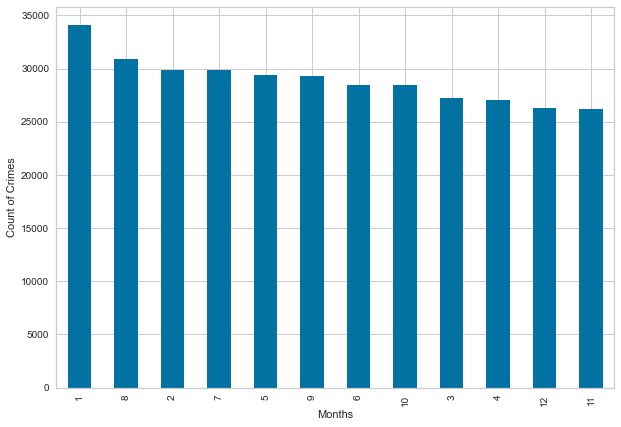

In [34]:
fig, ax = plt.subplots(figsize=(10, 7))
dataset4['Month'].value_counts().plot(kind='bar', );
# plt.plot(x_coordinates, y_coordinates)
plt.xlabel("Months")
plt.ylabel("Count of Crimes")
plt.show()


Count of Crimes on each Day:

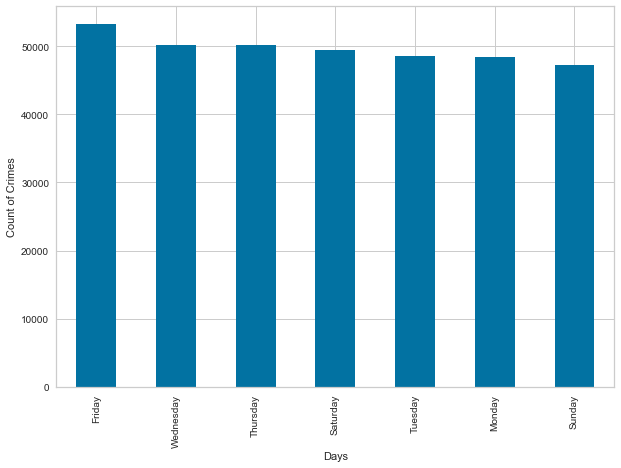

In [35]:
fig, ax = plt.subplots(figsize=(10, 7))
dataset4['Day'].value_counts().plot(kind='bar', );
# plt.plot(x_coordinates, y_coordinates)
plt.xlabel("Days")
plt.ylabel("Count of Crimes")
plt.show()


Count of Crimes in Hours:"

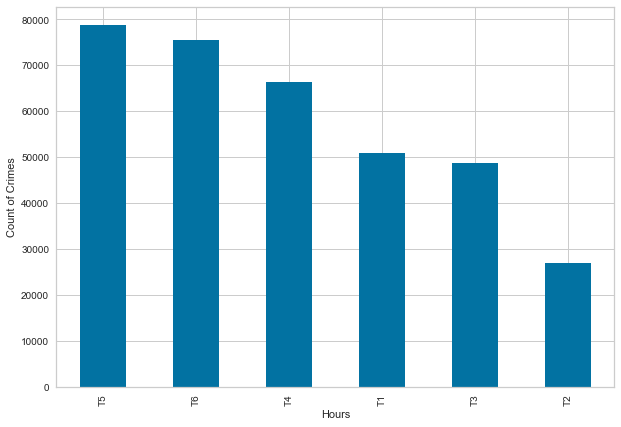

In [36]:
fig, ax = plt.subplots(figsize=(10, 7))
dataset4['time'].value_counts().plot(kind='bar', );
# plt.plot(x_coordinates, y_coordinates)
plt.xlabel("Hours")
plt.ylabel("Count of Crimes")
plt.show()


# Implementations of Algorithms:

In [2]:
data = pd.read_csv('Downloads/CRIME PREDICTION BASED ON CRIME TYPES.csv')
data.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016461725,2016461725549900,5499,0,traf-other,all-other-crimes,7/21/2016 6:40:00 PM,NaN,7/21/2016 7:09:00 PM,N COLUMBINE ST / E 48TH AVE,3152605.0,1710822.0,-104.957009,39.783762,2.0,212.0,elyria-swansea,1,0
1,2016102596,2016102596544100,5441,0,traffic-accident,traffic-accident,2/17/2016 6:00:00 PM,NaN,2/17/2016 6:00:00 PM,4400 N RARITAN ST,3138080.0,1708164.0,-105.008741,39.776692,1.0,111.0,sunnyside,0,1
2,2016361998,2016361998230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,6/9/2016 12:28:00 AM,NaN,6/9/2016 5:45:00 PM,2347 N AKRON CT,3173436.0,1699056.0,-104.883175,39.751097,5.0,512.0,stapleton,1,0
3,2016376067,2016376067544100,5441,0,traffic-accident,traffic-accident,6/15/2016 4:43:00 PM,NaN,6/15/2016 6:20:00 PM,1300 BLOCK 15TH ST,3140839.0,1697933.0,-104.999126,39.748565,6.0,612.0,union-station,0,1
4,2016292275,2016292275240400,2404,0,theft-of-motor-vehicle,auto-theft,5/10/2016 3:00:00 PM,5/10/2016 3:15:00 PM,5/10/2016 3:50:00 PM,E HARVARD AVE / S MILWAUKEE ST,3154183.0,1669827.0,-104.952274,39.671197,3.0,314.0,university-park,1,0


In [3]:
# Selecting relevant columns from dataset

dataset = data[["OFFENSE_CATEGORY_ID","FIRST_OCCURRENCE_DATE","GEO_LON","GEO_LAT","NEIGHBORHOOD_ID","IS_CRIME"]]
dataset

,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME
0,all-other-crimes,7/21/2016 6:40:00 PM,-104.957009,39.783762,elyria-swansea,1
1,traffic-accident,2/17/2016 6:00:00 PM,-105.008741,39.776692,sunnyside,0
2,theft-from-motor-vehicle,6/9/2016 12:28:00 AM,-104.883175,39.751097,stapleton,1
3,traffic-accident,6/15/2016 4:43:00 PM,-104.999126,39.748565,union-station,0
4,auto-theft,5/10/2016 3:00:00 PM,-104.952274,39.671197,university-park,1
...,...,...,...,...,...,...
467145,drug-alcohol,11/9/2019 11:05:00 AM,-104.673812,39.849292,dia,1
467146,all-other-crimes,6/18/2020 8:35:00 PM,-104.972725,39.762009,whittier,1
467147,all-other-crimes,5/14/2020 3:38:00 PM,-105.050916,39.776572,berkeley,1
467148,larceny,6/2/2020 9:15:00 AM,-104.873234,39.673130,hampden,1


In [4]:
#selecting rows from the dataset which has crime=1

dataset2= dataset.loc[dataset['IS_CRIME'] == 1]
dataset2

,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME
0,all-other-crimes,7/21/2016 6:40:00 PM,-104.957009,39.783762,elyria-swansea,1
2,theft-from-motor-vehicle,6/9/2016 12:28:00 AM,-104.883175,39.751097,stapleton,1
4,auto-theft,5/10/2016 3:00:00 PM,-104.952274,39.671197,university-park,1
5,auto-theft,6/22/2016 10:00:00 PM,-105.051254,39.773224,berkeley,1
7,public-disorder,7/11/2016 4:50:00 PM,-104.915106,39.650024,hampden-south,1
...,...,...,...,...,...,...
467145,drug-alcohol,11/9/2019 11:05:00 AM,-104.673812,39.849292,dia,1
467146,all-other-crimes,6/18/2020 8:35:00 PM,-104.972725,39.762009,whittier,1
467147,all-other-crimes,5/14/2020 3:38:00 PM,-105.050916,39.776572,berkeley,1
467148,larceny,6/2/2020 9:15:00 AM,-104.873234,39.673130,hampden,1


In [5]:
# deleting is-crime column

del dataset2["IS_CRIME"]
dataset2

,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID
0,all-other-crimes,7/21/2016 6:40:00 PM,-104.957009,39.783762,elyria-swansea
2,theft-from-motor-vehicle,6/9/2016 12:28:00 AM,-104.883175,39.751097,stapleton
4,auto-theft,5/10/2016 3:00:00 PM,-104.952274,39.671197,university-park
5,auto-theft,6/22/2016 10:00:00 PM,-105.051254,39.773224,berkeley
7,public-disorder,7/11/2016 4:50:00 PM,-104.915106,39.650024,hampden-south
...,...,...,...,...,...
467145,drug-alcohol,11/9/2019 11:05:00 AM,-104.673812,39.849292,dia
467146,all-other-crimes,6/18/2020 8:35:00 PM,-104.972725,39.762009,whittier
467147,all-other-crimes,5/14/2020 3:38:00 PM,-105.050916,39.776572,berkeley
467148,larceny,6/2/2020 9:15:00 AM,-104.873234,39.673130,hampden


In [6]:
dataset2["OFFENSE_CATEGORY_ID"].unique()

array(['all-other-crimes', 'theft-from-motor-vehicle', 'auto-theft',
       'public-disorder', 'drug-alcohol', 'other-crimes-against-persons',
       'larceny', 'white-collar-crime', 'burglary', 'robbery',
       'aggravated-assault', 'sexual-assault', 'murder', 'arson'],
      dtype=object)

In [7]:
#selecting the rows with types of crimes we are dealing with

types=["aggravated-assault","all-other-crimes","arson","auto-theft","burglary","drug-alcohol","larceny","murder","other-crimes-against-persons","theft-from-motor-vehicle","sexual-assault","robbery","public-disorder"]

dataset3=dataset2.loc[(dataset2["OFFENSE_CATEGORY_ID"]==types[0]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[1]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[2]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[3]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[4]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[5]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[6]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[7]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[8])| (dataset2["OFFENSE_CATEGORY_ID"]==types[9])| (dataset2["OFFENSE_CATEGORY_ID"]==types[10]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[11]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[12])]
dataset3
#selecting the rows with types of crimes we are dealing with
# types=["aggravated-assault","all-other-crimes","arson","burglary","larceny","murder","other-crimes-against-persons","theft-from-motor-vehicle","sexual-assault","robbery","public-disorder"]
# dataset3=dataset2.loc[(dataset2["OFFENSE_CATEGORY_ID"]==types[0]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[1]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[2]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[3]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[4]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[5]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[6]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[7]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[8])| (dataset2["OFFENSE_CATEGORY_ID"]==types[9])| (dataset2["OFFENSE_CATEGORY_ID"]==types[10])]
# dataset3.head()

,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID
0,all-other-crimes,7/21/2016 6:40:00 PM,-104.957009,39.783762,elyria-swansea
2,theft-from-motor-vehicle,6/9/2016 12:28:00 AM,-104.883175,39.751097,stapleton
4,auto-theft,5/10/2016 3:00:00 PM,-104.952274,39.671197,university-park
5,auto-theft,6/22/2016 10:00:00 PM,-105.051254,39.773224,berkeley
7,public-disorder,7/11/2016 4:50:00 PM,-104.915106,39.650024,hampden-south
...,...,...,...,...,...
467143,aggravated-assault,10/16/2020 11:05:00 PM,-104.999064,39.737331,lincoln-park
467145,drug-alcohol,11/9/2019 11:05:00 AM,-104.673812,39.849292,dia
467146,all-other-crimes,6/18/2020 8:35:00 PM,-104.972725,39.762009,whittier
467147,all-other-crimes,5/14/2020 3:38:00 PM,-105.050916,39.776572,berkeley


In [8]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second

x = pd.to_datetime(dataset3['FIRST_OCCURRENCE_DATE'])
dataset3['Year'] = x.dt.year
dataset3['Month'] = x.dt.month
dataset3['Day'] = x.dt.day
dataset3['time'] = x.dt.hour
dataset3 = dataset3.drop(['FIRST_OCCURRENCE_DATE'], axis=1)
dataset3.head()

<ipython-input-8-5b669d4303bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset3['Year'] = x.dt.year
<ipython-input-8-5b669d4303bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset3['Month'] = x.dt.month
<ipython-input-8-5b669d4303bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,Year,Month,Day,time
0,all-other-crimes,-104.957009,39.783762,elyria-swansea,2016,7,21,18
2,theft-from-motor-vehicle,-104.883175,39.751097,stapleton,2016,6,9,0
4,auto-theft,-104.952274,39.671197,university-park,2016,5,10,15
5,auto-theft,-105.051254,39.773224,berkeley,2016,6,22,22
7,public-disorder,-104.915106,39.650024,hampden-south,2016,7,11,16


In [9]:
len(dataset3[dataset3["OFFENSE_CATEGORY_ID"]=="arson"])

616

In [10]:
#storing in a new csv file

dataset3.to_csv("predata.csv")

In [11]:
#deleting the extra column from the .csv file
dataset4= pd.read_csv("predata.csv")
del dataset4['Unnamed: 0']
dataset4.head()

,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,Year,Month,Day,time
0,all-other-crimes,-104.957009,39.783762,elyria-swansea,2016,7,21,18
1,theft-from-motor-vehicle,-104.883175,39.751097,stapleton,2016,6,9,0
2,auto-theft,-104.952274,39.671197,university-park,2016,5,10,15
3,auto-theft,-105.051254,39.773224,berkeley,2016,6,22,22
4,public-disorder,-104.915106,39.650024,hampden-south,2016,7,11,16


In [12]:
types=["aggravated-assault","all-other-crimes","auto-theft","arson","burglary","drug-alcohol","larceny","murder","other-crimes-against-persons","theft-from-motor-vehicle","sexual-assault","robbery","public-disorder"]
lst={}
for i in types:
    lst[i]=(len(dataset3[dataset3["OFFENSE_CATEGORY_ID"]==i]))
print((lst))
# print(types)

{'aggravated-assault': 12634, 'all-other-crimes': 80230, 'auto-theft': 31658, 'arson': 616, 'burglary': 23535, 'drug-alcohol': 25996, 'larceny': 48723, 'murder': 343, 'other-crimes-against-persons': 22644, 'theft-from-motor-vehicle': 42768, 'sexual-assault': 4005, 'robbery': 6140, 'public-disorder': 48043}


In [13]:
#Converting crime type id to numeric data
crime_numeric = {"OFFENSE_CATEGORY_ID": {"aggravated-assault":1,"auto-theft":5,"all-other-crimes":3,"arson":4,"burglary":5,"drug-alcohol":2,"larceny":3,"murder":1,"other-crimes-against-persons":3,"theft-from-motor-vehicle":5,"sexual-assault":1,"robbery":5,"public-disorder":4}}
dataset4 = dataset4.replace(crime_numeric)
dataset4

#Converting crime type id to numeric data
# crime_numeric = {"OFFENSE_CATEGORY_ID": {"aggravated-assault":1,"all-other-crimes":3,"arson":4,"burglary":2,"larceny":2,"murder":2,"other-crimes-against-persons":3,"theft-from-motor-vehicle":2,"sexual-assault":3,"robbery":2,"public-disorder":4 }}
# dataset4 = dataset4.replace(crime_numeric)
# dataset4.head()

,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,Year,Month,Day,time
0,3,-104.957009,39.783762,elyria-swansea,2016,7,21,18
1,5,-104.883175,39.751097,stapleton,2016,6,9,0
2,5,-104.952274,39.671197,university-park,2016,5,10,15
3,5,-105.051254,39.773224,berkeley,2016,6,22,22
4,4,-104.915106,39.650024,hampden-south,2016,7,11,16
...,...,...,...,...,...,...,...,...
347330,1,-104.999064,39.737331,lincoln-park,2020,10,16,23
347331,2,-104.673812,39.849292,dia,2019,11,9,11
347332,3,-104.972725,39.762009,whittier,2020,6,18,20
347333,3,-105.050916,39.776572,berkeley,2020,5,14,15


In [14]:
# del dataset4["IS_CRIME"]
# dataset4

In [15]:
#converting location data to nominal data

dataset4['NEIGHBORHOOD_ID'] = pd.factorize(dataset4["NEIGHBORHOOD_ID"])[0]
dataset4.head()

,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,Year,Month,Day,time
0,3,-104.957009,39.783762,0,2016,7,21,18
1,5,-104.883175,39.751097,1,2016,6,9,0
2,5,-104.952274,39.671197,2,2016,5,10,15
3,5,-105.051254,39.773224,3,2016,6,22,22
4,4,-104.915106,39.650024,4,2016,7,11,16


In [16]:
# d=dataset[dataset['time'].isin(['0','1','2','3'])]
# d
from tqdm import tqdm

for index,i in enumerate(tqdm(dataset4['time'])):
    if i<=3:
        dataset4['time'][index]=0
    elif i<=7:
        dataset4['time'][index]=1
    elif i<=11:
        dataset4['time'][index]=2
    elif i<=15:
        dataset4['time'][index]=3
    elif i<=19:
        dataset4['time'][index]=4
    elif i<=23:
        dataset4['time'][index]=5
        
        

  0%|                                                                                       | 0/347335 [00:00<?, ?it/s]<ipython-input-16-807aebfa9a18>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset4['time'][index]=4
<ipython-input-16-807aebfa9a18>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset4['time'][index]=0
<ipython-input-16-807aebfa9a18>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset4['time'][index]

In [17]:
dataset4.head()

,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,Year,Month,Day,time
0,3,-104.957009,39.783762,0,2016,7,21,4
1,5,-104.883175,39.751097,1,2016,6,9,0
2,5,-104.952274,39.671197,2,2016,5,10,3
3,5,-105.051254,39.773224,3,2016,6,22,5
4,4,-104.915106,39.650024,4,2016,7,11,4


In [18]:
#Seperating Features X and labels y

from sklearn.model_selection import train_test_split

Features=dataset4[["NEIGHBORHOOD_ID","Day","time","Month"]]
Labels=dataset4[['OFFENSE_CATEGORY_ID']]

In [19]:
s=0
for i in range(1,6):
    print("Class:",i," no of samples:")
    print(len(dataset4[dataset4["OFFENSE_CATEGORY_ID"]==i]))
    s+=len(dataset4[dataset4["OFFENSE_CATEGORY_ID"]==i])

print("\nTotal samples",s)

Class: 1  no of samples:
16982
Class: 2  no of samples:
25996
Class: 3  no of samples:
151597
Class: 4  no of samples:
48659
Class: 5  no of samples:
104101

Total samples 347335


# Multinominal Naive Bayes

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import MultinomialNB


In [20]:
from sklearn.model_selection import StratifiedKFold
xtrain=[]
ytrain=[]

X_train, X_test, Y_train, Y_test = train_test_split(Features, Labels, test_size = 0.50,random_state=45)

for i in (X_train.values):
    xtrain.append(i)
for i in (X_test.values):
    xtrain.append(i)
    
for i in (Y_train.values):
    ytrain.append(i)
for i in (Y_test.values):
    ytrain.append(i)


folds=5
skf = StratifiedKFold(n_splits=folds ,random_state=35,shuffle=True)
# X is the feature set and y is the target
print(skf)

average_accuracy=[]
for train_index, val_index in skf.split(np.asarray(xtrain),np.asarray(ytrain)): 
#     print("Train:", train_index, "Validation:", val_index) 
    x_train=[]
    x_test=[]
    y_train=[]
    y_test=[]
    
    for i in train_index:
        x_train.append(xtrain[i])
        y_train.append(ytrain[i])
    for i in val_index:
        x_test.append(xtrain[i])
        y_test.append(ytrain[i])
        
    model = MultinomialNB()
    model.fit(np.asarray(x_train),np.asarray(y_train))
    y_predict = model.predict(np.asarray(x_test))
    acc=accuracy_score(np.asarray(y_test), y_predict)
    print("Accuracy:", acc)
    average_accuracy.append(acc)

print("Average Accuracy:",(sum(average_accuracy)*100)/folds,"%")

StratifiedKFold(n_splits=5, random_state=35, shuffle=True)


C:\Users\TAHA MUZAMMIL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.3834626513308477


C:\Users\TAHA MUZAMMIL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.3811162134538702


C:\Users\TAHA MUZAMMIL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.3825989318669296


C:\Users\TAHA MUZAMMIL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.38543481077346076


C:\Users\TAHA MUZAMMIL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.38146170123943746
Average Accuracy: 38.281486173290915 %


In [21]:
## Calculate accuracy & make the confusion matrix
## Display the confusion matrix as a heatmap as well
from sklearn import metrics
from sklearn import metrics


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
rc_sc = recall_score(y_test, y_predict, average="weighted")
pr_sc = precision_score(y_test, y_predict, average="weighted")
f1_sc = f1_score(y_test, y_predict, average='macro')
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
confusion_matrix=metrics.confusion_matrix(y_test, y_predict)
confusion_matrix

Accuracy: 0.38146170123943746


C:\Users\TAHA MUZAMMIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall      :  0.38146170123943746
Precision   :  0.3037141326315352
F1 Score    :  0.19183044458200338


array([[    0,   276,  2078,     0,  1043],
       [    0,   469,  3361,     0,  1370],
       [    0,  2451, 17947,     0,  9921],
       [    0,   814,  5623,     0,  3294],
       [    0,  1646, 11091,     0,  8083]], dtype=int64)

# Gaussian Naive Bayes:

In [23]:
#Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
#Create a Gaussian Classifier
model = GaussianNB()
# Train the model using the training sets
model.fit(x_train,y_train)

C:\Users\TAHA MUZAMMIL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [24]:
from sklearn.model_selection import StratifiedKFold
xtrain=[]
ytrain=[]

X_train, X_test, Y_train, Y_test = train_test_split(Features, Labels, test_size = 0.50,random_state=45)

for i in (X_train.values):
    xtrain.append(i)
for i in (X_test.values):
    xtrain.append(i)
    
for i in (Y_train.values):
    ytrain.append(i)
for i in (Y_test.values):
    ytrain.append(i)


folds=5
skf = StratifiedKFold(n_splits=folds ,random_state=35,shuffle=True)
# X is the feature set and y is the target
print(skf)

average_accuracy=[]
for train_index, val_index in skf.split(np.asarray(xtrain),np.asarray(ytrain)): 
#     print("Train:", train_index, "Validation:", val_index) 
    x_train=[]
    x_test=[]
    y_train=[]
    y_test=[]
    
    for i in train_index:
        x_train.append(xtrain[i])
        y_train.append(ytrain[i])
    for i in val_index:
        x_test.append(xtrain[i])
        y_test.append(ytrain[i])
        
    model = GaussianNB()
    model.fit(np.asarray(x_train),np.asarray(y_train))
    y_predict = model.predict(np.asarray(x_test))
    acc=accuracy_score(np.asarray(y_test), y_predict)
    print("Accuracy:", acc)
    average_accuracy.append(acc)

print("Average Accuracy:",(sum(average_accuracy)*100)/folds,"%")

StratifiedKFold(n_splits=5, random_state=35, shuffle=True)


C:\Users\TAHA MUZAMMIL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.43354398491370005


C:\Users\TAHA MUZAMMIL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.4336447521844905


C:\Users\TAHA MUZAMMIL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.43391826334806455


C:\Users\TAHA MUZAMMIL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.43368793815768636


C:\Users\TAHA MUZAMMIL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.43416298386284136
Average Accuracy: 43.379158449335655 %


In [25]:
y_predict = model.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.43416298386284136

In [26]:
## Calculate accuracy & make the confusion matrix
## Display the confusion matrix as a heatmap as well
from sklearn import metrics
from sklearn import metrics


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
rc_sc = recall_score(y_test, y_predict, average="weighted")
pr_sc = precision_score(y_test, y_predict, average="weighted")
f1_sc = f1_score(y_test, y_predict, average='weighted')
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
confusion_matrix=metrics.confusion_matrix(y_test, y_predict)
confusion_matrix

Accuracy: 0.43416298386284136


C:\Users\TAHA MUZAMMIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall      :  0.43416298386284136
Precision   :  0.3022815297732341
F1 Score    :  0.2928389675871361


array([[    0,     0,  3258,     0,   139],
       [    0,     0,  5080,     0,   120],
       [    0,     0, 28903,     0,  1416],
       [    0,     0,  9281,     0,   450],
       [    0,     0, 19563,     0,  1257]], dtype=int64)

# Decisions Tree:

In [28]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()


In [29]:
from sklearn.model_selection import StratifiedKFold
xtrain=[]
ytrain=[]

X_train, X_test, Y_train, Y_test = train_test_split(Features, Labels, test_size = 0.50,random_state=45)

for i in (X_train.values):
    xtrain.append(i)
for i in (X_test.values):
    xtrain.append(i)
    
for i in (Y_train.values):
    ytrain.append(i)
for i in (Y_test.values):
    ytrain.append(i)


folds=5
skf = StratifiedKFold(n_splits=folds ,random_state=35,shuffle=True)
# X is the feature set and y is the target
print(skf)

average_accuracy=[]
for train_index, val_index in skf.split(np.asarray(xtrain),np.asarray(ytrain)): 
#     print("Train:", train_index, "Validation:", val_index) 
    x_train=[]
    x_test=[]
    y_train=[]
    y_test=[]
    
    for i in train_index:
        x_train.append(xtrain[i])
        y_train.append(ytrain[i])
    for i in val_index:
        x_test.append(xtrain[i])
        y_test.append(ytrain[i])
        
    clf = tree.DecisionTreeClassifier()
    
    
    clf.fit(np.asarray(x_train),np.asarray(y_train))
    y_predict = clf.predict(np.asarray(x_test))
    acc=accuracy_score(np.asarray(y_test), y_predict)
    print("Accuracy:", acc)
    average_accuracy.append(acc)

print("Average Accuracy:",(sum(average_accuracy)*100)/folds,"%")

StratifiedKFold(n_splits=5, random_state=35, shuffle=True)
Accuracy: 0.3785106597377172
Accuracy: 0.38154807318582923
Accuracy: 0.38305958224768594
Accuracy: 0.38049721450472884
Accuracy: 0.3814904918882347
Average Accuracy: 38.10212043128392 %


In [31]:
## Calculate accuracy & make the confusion matrix
## Display the confusion matrix as a heatmap as well
from sklearn import metrics
from sklearn import metrics


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
rc_sc = recall_score(y_test, y_predict, average="weighted")
pr_sc = precision_score(y_test, y_predict, average="weighted")
f1_sc = f1_score(y_test, y_predict, average='macro')
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
confusion_matrix=metrics.confusion_matrix(y_test, y_predict)
confusion_matrix

Accuracy: 0.3814904918882347
Recall      :  0.3814904918882347
Precision   :  0.37013417545710897
F1 Score    :  0.2527407891709649


array([[  254,   261,  1789,   319,   774],
       [  242,   963,  2840,   394,   761],
       [ 1642,  2502, 17921,  2773,  5481],
       [  577,   657,  5229,  1284,  1984],
       [ 1270,  1419,  9793,  2259,  6079]], dtype=int64)

### Neural Networks

In [46]:
from sklearn.model_selection import StratifiedKFold
xtrain=[]
ytrain=[]

X_train, X_test, Y_train, Y_test = train_test_split(Features, Labels, test_size = 0.50,random_state=45)

for i in (X_train.values):
    xtrain.append(i)
for i in (X_test.values):
    xtrain.append(i)
    
for i in (Y_train.values):
    ytrain.append(i)
for i in (Y_test.values):
    ytrain.append(i)


folds=5
skf = StratifiedKFold(n_splits=folds ,random_state=35,shuffle=True)
# X is the feature set and y is the target
print(skf)

average_accuracy=[]
for train_index, val_index in skf.split(np.asarray(xtrain),np.asarray(ytrain)): 
#     print("Train:", train_index, "Validation:", val_index) 
    x_train=[]
    x_test=[]
    y_train=[]
    y_test=[]
    
    for i in train_index:
        x_train.append(xtrain[i])
        y_train.append(ytrain[i])
    for i in val_index:
        x_test.append(xtrain[i])
        y_test.append(ytrain[i])
        
    model = MLPClassifier(hidden_layer_sizes=(50,20), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='adaptive', shuffle=True, random_state=None, verbose=False)
    model.fit(np.asarray(x_train),np.asarray(y_train))
    y_predict = model.predict(np.asarray(x_test))
    acc=accuracy_score(np.asarray(y_test), y_predict)
    print("Accuracy:", acc)
    average_accuracy.append(acc)

print("Average Accuracy:",(sum(average_accuracy)*100)/folds,"%")

StratifiedKFold(n_splits=5, random_state=35, shuffle=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.4451034304058042


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.45030014251371153


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.45209955806354096


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.45100551340924466


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.4496379575913743
Average Accuracy: 44.96293203967351 %


In [47]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
rc_sc = recall_score(y_test, y_predict, average="weighted")
pr_sc = precision_score(y_test, y_predict, average="weighted")
f1_sc = f1_score(y_test, y_predict, average='macro')
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
confusion_matrix=metrics.confusion_matrix(y_test, y_predict)
confusion_matrix

Accuracy: 0.4496379575913743


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall      :  0.4496379575913743
Precision   :  0.3252528536595539
F1 Score    :  0.18710234684847032


array([[    0,     0,  2732,     0,   665],
       [    0,     0,  4654,     0,   546],
       [    0,     0, 25100,     0,  5219],
       [    0,     0,  7625,     0,  2106],
       [    0,     0, 14685,     0,  6135]], dtype=int64)

### Logistic Regression

In [48]:
from sklearn.model_selection import StratifiedKFold
xtrain=[]
ytrain=[]

X_train, X_test, Y_train, Y_test = train_test_split(Features, Labels, test_size = 0.50,random_state=45)

for i in (X_train.values):
    xtrain.append(i)
for i in (X_test.values):
    xtrain.append(i)
    
for i in (Y_train.values):
    ytrain.append(i)
for i in (Y_test.values):
    ytrain.append(i)


folds=5
skf = StratifiedKFold(n_splits=folds ,random_state=35,shuffle=True)
# X is the feature set and y is the target
print(skf)

average_accuracy=[]
for train_index, val_index in skf.split(np.asarray(xtrain),np.asarray(ytrain)): 
#     print("Train:", train_index, "Validation:", val_index) 
    x_train=[]
    x_test=[]
    y_train=[]
    y_test=[]
    
    for i in train_index:
        x_train.append(xtrain[i])
        y_train.append(ytrain[i])
    for i in val_index:
        x_test.append(xtrain[i])
        y_test.append(ytrain[i])
        
    model = LogisticRegression(random_state=0)
    model.fit(np.asarray(x_train),np.asarray(y_train))
    y_predict = model.predict(np.asarray(x_test))
    acc=accuracy_score(np.asarray(y_test), y_predict)
    print("Accuracy:", acc)
    average_accuracy.append(acc)

print("Average Accuracy:",(sum(average_accuracy)*100)/folds,"%")

StratifiedKFold(n_splits=5, random_state=35, shuffle=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.4343069371068277


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.43348640361610546


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.4336015662112946


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.4346812155411922


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.4340622165920509
Average Accuracy: 43.40276678134943 %


In [49]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
rc_sc = recall_score(y_test, y_predict, average="weighted")
pr_sc = precision_score(y_test, y_predict, average="weighted")
f1_sc = f1_score(y_test, y_predict, average='macro')
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
confusion_matrix=metrics.confusion_matrix(y_test, y_predict)
confusion_matrix

Accuracy: 0.4340622165920509


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall      :  0.4340622165920509
Precision   :  0.3019410278993627
F1 Score    :  0.13698522418838047


array([[    0,     0,  3300,     0,    97],
       [    0,     0,  5117,     0,    83],
       [    0,     0, 29162,     0,  1157],
       [    0,     0,  9393,     0,   338],
       [    0,     0, 19829,     0,   991]], dtype=int64)

### Apriori Algorithm

In [37]:
data = pd.read_csv('C:/Users/TAHA MUZAMMIL/Desktop/LUMS DATA/Smester 2/Big Data Analytics/BDA project/Dataset/Denver_dataset.csv')
dataset = data[["OFFENSE_CATEGORY_ID","FIRST_OCCURRENCE_DATE","GEO_LON","GEO_LAT","NEIGHBORHOOD_ID","IS_CRIME"]]
dataset

,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME
0,all-other-crimes,7/21/2016 18:40,-104.957009,39.783762,elyria-swansea,1
1,traffic-accident,2/17/2016 18:00,-105.008741,39.776692,sunnyside,0
2,theft-from-motor-vehicle,6/9/2016 0:28,-104.883175,39.751097,stapleton,1
3,traffic-accident,6/15/2016 16:43,-104.999126,39.748565,union-station,0
4,auto-theft,5/10/2016 15:00,-104.952274,39.671197,university-park,1
...,...,...,...,...,...,...
467145,drug-alcohol,11/9/2019 11:05,-104.673812,39.849292,dia,1
467146,all-other-crimes,6/18/2020 20:35,-104.972725,39.762009,whittier,1
467147,all-other-crimes,5/14/2020 15:38,-105.050916,39.776572,berkeley,1
467148,larceny,6/2/2020 9:15,-104.873234,39.673130,hampden,1


In [38]:
#selecting rows from the dataset which has crime=1

dataset2= dataset.loc[dataset['IS_CRIME'] == 1]
del dataset2["IS_CRIME"]
dataset2

,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID
0,all-other-crimes,7/21/2016 18:40,-104.957009,39.783762,elyria-swansea
2,theft-from-motor-vehicle,6/9/2016 0:28,-104.883175,39.751097,stapleton
4,auto-theft,5/10/2016 15:00,-104.952274,39.671197,university-park
5,auto-theft,6/22/2016 22:00,-105.051254,39.773224,berkeley
7,public-disorder,7/11/2016 16:50,-104.915106,39.650024,hampden-south
...,...,...,...,...,...
467145,drug-alcohol,11/9/2019 11:05,-104.673812,39.849292,dia
467146,all-other-crimes,6/18/2020 20:35,-104.972725,39.762009,whittier
467147,all-other-crimes,5/14/2020 15:38,-105.050916,39.776572,berkeley
467148,larceny,6/2/2020 9:15,-104.873234,39.673130,hampden


In [39]:
#selecting the rows with types of crimes we are dealing with
types=["aggravated-assault","all-other-crimes","arson","auto-theft","burglary","drug-alcohol","larceny","murder","other-crimes-against-persons","theft-from-motor-vehicle","sexual-assault","robbery","public-disorder"]
dataset3=dataset2.loc[(dataset2["OFFENSE_CATEGORY_ID"]==types[0]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[1]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[2]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[3]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[4]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[5]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[6]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[7]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[8])| (dataset2["OFFENSE_CATEGORY_ID"]==types[9])| (dataset2["OFFENSE_CATEGORY_ID"]==types[10]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[11]) | (dataset2["OFFENSE_CATEGORY_ID"]==types[12])]
dataset3

,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID
0,all-other-crimes,7/21/2016 18:40,-104.957009,39.783762,elyria-swansea
2,theft-from-motor-vehicle,6/9/2016 0:28,-104.883175,39.751097,stapleton
4,auto-theft,5/10/2016 15:00,-104.952274,39.671197,university-park
5,auto-theft,6/22/2016 22:00,-105.051254,39.773224,berkeley
7,public-disorder,7/11/2016 16:50,-104.915106,39.650024,hampden-south
...,...,...,...,...,...
467143,aggravated-assault,10/16/2020 23:05,-104.999064,39.737331,lincoln-park
467145,drug-alcohol,11/9/2019 11:05,-104.673812,39.849292,dia
467146,all-other-crimes,6/18/2020 20:35,-104.972725,39.762009,whittier
467147,all-other-crimes,5/14/2020 15:38,-105.050916,39.776572,berkeley


In [40]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second

x = pd.to_datetime(dataset3['FIRST_OCCURRENCE_DATE'])
dataset3['Year'] = x.dt.year
dataset3['Month'] = x.dt.month
dataset3['Day'] = x.dt.day_name()
dataset3['time'] = x.dt.hour
dataset3 = dataset3.drop(['FIRST_OCCURRENCE_DATE'], axis=1)
dataset3.head()

<ipython-input-40-19b5c10f758b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset3['Year'] = x.dt.year
<ipython-input-40-19b5c10f758b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset3['Month'] = x.dt.month
<ipython-input-40-19b5c10f758b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,Year,Month,Day,time
0,all-other-crimes,-104.957009,39.783762,elyria-swansea,2016,7,Thursday,18
2,theft-from-motor-vehicle,-104.883175,39.751097,stapleton,2016,6,Thursday,0
4,auto-theft,-104.952274,39.671197,university-park,2016,5,Tuesday,15
5,auto-theft,-105.051254,39.773224,berkeley,2016,6,Wednesday,22
7,public-disorder,-104.915106,39.650024,hampden-south,2016,7,Monday,16


In [41]:
#storing in a new csv file
dataset3.to_csv("predata_apriori.csv")

In [42]:
#deleting the extra column from the .csv file
dataset4= pd.read_csv("predata_apriori.csv")
del dataset4['Unnamed: 0']
dataset4.head()

,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,Year,Month,Day,time
0,all-other-crimes,-104.957009,39.783762,elyria-swansea,2016,7,Thursday,18
1,theft-from-motor-vehicle,-104.883175,39.751097,stapleton,2016,6,Thursday,0
2,auto-theft,-104.952274,39.671197,university-park,2016,5,Tuesday,15
3,auto-theft,-105.051254,39.773224,berkeley,2016,6,Wednesday,22
4,public-disorder,-104.915106,39.650024,hampden-south,2016,7,Monday,16


In [43]:
from tqdm import tqdm
for index,i in enumerate(tqdm(dataset4['time'])):
    if i<=3:
        dataset4['time'][index]="T1"
    elif i<=7:
        dataset4['time'][index]="T2"
    elif i<=11:
        dataset4['time'][index]="T3"
    elif i<=15:
        dataset4['time'][index]="T4"
    elif i<=19:
        dataset4['time'][index]="T5"
    elif i<=23:
        dataset4['time'][index]="T6"

  0%|                                                                                       | 0/347335 [00:00<?, ?it/s]<ipython-input-43-929ea2d267ab>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset4['time'][index]="T5"
C:\Users\TAHA MUZAMMIL\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-43-929ea2d267ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [44]:
data_frame = dataset4[['NEIGHBORHOOD_ID','Day','time']]
data_frame.to_csv("apriori_file.csv")

In [45]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [46]:
data_frame = pd.read_csv("apriori_file.csv")
del data_frame['Unnamed: 0']
data_frame.head()


,NEIGHBORHOOD_ID,Day,time
0,elyria-swansea,Thursday,T5
1,stapleton,Thursday,T1
2,university-park,Tuesday,T4
3,berkeley,Wednesday,T6
4,hampden-south,Monday,T5


In [47]:
te = TransactionEncoder()
te_ary = te.fit(data_frame.values).transform(data_frame.values)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Friday,Monday,Saturday,Sunday,T1,T2,T3,T4,T5,T6,...,virginia-village,washington-park,washington-park-west,washington-virginia-vale,wellshire,west-colfax,west-highland,westwood,whittier,windsor
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347330,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
347331,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
347332,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
347333,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
from mlxtend.frequent_patterns import apriori

apriori_results = apriori(df, min_support=0.003, use_colnames=True)

In [49]:
for i in apriori_results.values:
    print(i)

[0.15319792131515683 frozenset({'Friday'})]
[0.13920854506456304 frozenset({'Monday'})]
[0.14246188837865462 frozenset({'Saturday'})]
[0.13604445276174298 frozenset({'Sunday'})]
[0.1468956482934343 frozenset({'T1'})]
[0.07754473347056876 frozenset({'T2'})]
[0.14006362733384198 frozenset({'T3'})]
[0.1913743216203377 frozenset({'T4'})]
[0.22701714483135876 frozenset({'T5'})]
[0.2171045244504585 frozenset({'T6'})]
[0.1444685965998244 frozenset({'Thursday'})]
[0.13994558567377316 frozenset({'Tuesday'})]
[0.144673010206285 frozenset({'Wednesday'})]
[0.01325233564138368 frozenset({'athmar-park'})]
[0.008717808455813552 frozenset({'auraria'})]
[0.019024860725236445 frozenset({'baker'})]
[0.010617991276433415 frozenset({'barnum'})]
[0.006106496609901104 frozenset({'barnum-west'})]
[0.007361768897462104 frozenset({'bear-valley'})]
[0.003993262988181439 frozenset({'belcaro'})]
[0.009077691565779434 frozenset({'berkeley'})]
[0.03893935249830855 frozenset({'capitol-hill'})]
[0.03844991146875495 fr

### FP Growth

In [50]:
from mlxtend.frequent_patterns import fpgrowth

In [60]:
fpgrowth_results=fpgrowth(df, min_support=0.0001, use_colnames=True)

In [61]:
for i in fpgrowth_results.values:
    print(i)

[0.22701714483135876 frozenset({'T5'})]
[0.1444685965998244 frozenset({'Thursday'})]
[0.012636215757122087 frozenset({'elyria-swansea'})]
[0.1468956482934343 frozenset({'T1'})]
[0.003287892092648308 frozenset({'stapleton'})]
[0.1913743216203377 frozenset({'T4'})]
[0.13994558567377316 frozenset({'Tuesday'})]
[0.00694430448990168 frozenset({'university-park'})]
[0.2171045244504585 frozenset({'T6'})]
[0.144673010206285 frozenset({'Wednesday'})]
[0.009077691565779434 frozenset({'berkeley'})]
[0.13920854506456304 frozenset({'Monday'})]
[0.012973066348050153 frozenset({'hampden-south'})]
[0.061070724228770495 frozenset({'five-points'})]
[0.03604877135906258 frozenset({'montbello'})]
[0.15319792131515683 frozenset({'Friday'})]
[0.016776311054169605 frozenset({'highland'})]
[0.007341615443304015 frozenset({'hale'})]
[0.03844991146875495 frozenset({'cbd'})]
[0.028329998416514315 frozenset({'union-station'})]
[0.14006362733384198 frozenset({'T3'})]
[0.14246188837865462 frozenset({'Saturday'})]
[